# 분석 내용

- 2013년부터 2019년까지의 전국 신규 민간 아파트의 분양 가격 동향을 분석한다.
- 다른 데이터셋을 가공하여 병합한다.
- 데이터 전처리 후에 시각화한다.
- 데이터셋은 공공데이터 포럼 (https://www.data.go.kr)
    - 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
    - 주택도시보증공사_전국 평균 분양가격(2019년 12월)
    
## 활용 functions 
- concat, pivot, transpose in Pandas
- groupby, pivot_table, info, describe, value_counts
- bar plot, line plot, scatter plot, lm plot, 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램

In [134]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# 데이터 분석 코드

## 데이터 불러오기

In [135]:
# 인코딩을 하지 않을 경우, 파일 로드하며 한글이 깨진다.

df_last = pd.read_csv('data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding="cp949")

# 데이터 크기
df_last.shape

(4335, 5)

## 파일 미리보기

In [136]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


## 2015년 분양가 데이터 불러오기

In [137]:
# 총 2개의 데이터 df_first, df_last가 불러왔다.

df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding="cp949")
df_first.shape

(17, 22)

In [138]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


## 데이터 요약하기

In [139]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


## 결측치 보기

In [140]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [141]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

## 데이터 타입 변경하기

보이는 형태는 숫자이지만 object 타입이므로 계산을 위해 수치 데이터 (int, float) 으로 변경한다.

In [142]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

## column을 추가하여 새로운 값을 입력하기

df_last 데이터셋에 평당 분양 가격 column을 추가한다. 

In [143]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


## 분양 가격 요약하기

In [144]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [145]:
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

## 전용면적 컬럼으로 변경하기

In [146]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [147]:
# 규모구분을 전용면적으로 변경하기

df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

## 불필요한 컬럼 제거하기

In [148]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [149]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


## groupby로 데이터 재가공하기

In [150]:
# 지역명에 따른 평당 분양 가격 평균가를 구한다.
# sum, mean, max, min, describe 등을 구할 수 있다.

df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [151]:
# 전용면적으로 분양가격의 평균을 구합니다.

df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [152]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# unstack() 하면 groupby 하고자 하는 내용이 컬럼으로 나온다.
# round() 하면 소숫점 1자리까지만 보여준다.

df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [153]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g
# g.unstack().transpose()

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

## pivot table로 데이터 집계

groupby 대신 pivot_table로 데이터 집계 가능하다.
- groupby를 사용하면 series 형태로 결과가 나온다.
- pivot_table 결과는 data frame 형태로 결과가 나온다.

In [154]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [155]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()
# pivot과 pivot_table의 가장 큰 차이점은 aggregation 기능이 있느냐 없느냐 차이.
# pivot_table의 aggregation default 값은 mean.

pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [156]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()
# groupby는 series이므로 연산 속도가 더 빠르다.

df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [157]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
# 행을 기준으로 가져올 때 loc를 쓴다. 2017년 데이터만 갖고 오고 싶으면 다음과 같다. 
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


# 한글 폰트 사용하기

In [158]:
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")

# 데이터 시각화 하기

## 선 그래프와 막대 그래프

<AxesSubplot:xlabel='지역명'>

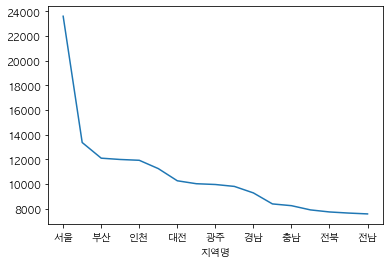

In [159]:
# 지역명으로 분양 가격의 평균을 구하고 선 그래프로 시각화 한다.

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

<AxesSubplot:xlabel='지역명'>

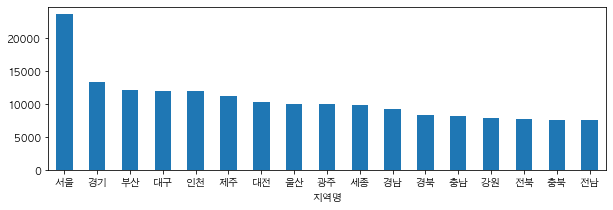

In [160]:
# 지역명으로 분양 가격의 평균을 구하고 막대 그래프로 시각화 한다.

g.plot.bar(rot=0, figsize=(10, 3))

<AxesSubplot:xlabel='전용면적'>

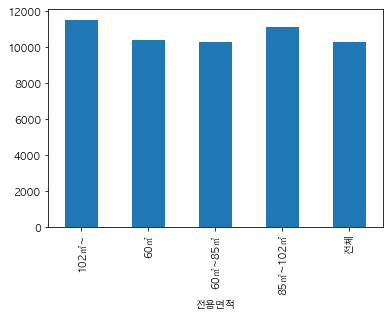

In [161]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프로 시각화 한다.

df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

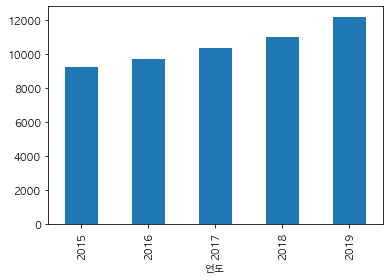

In [162]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

df_last.groupby(["연도"])["평당분양가격"].mean().plot.bar()

## box-and-whisker plot

5가지 요약 수치를 그린다.

- 최솟값
- 제 1사분위수
- 제 2사분위수( ), 즉 중앙값
- 제 3 사분위 수( )
- 최댓값

<AxesSubplot:>

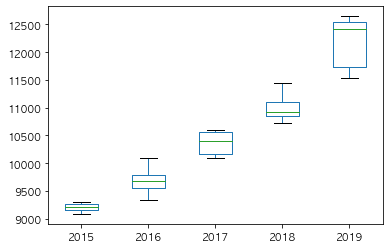

In [163]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

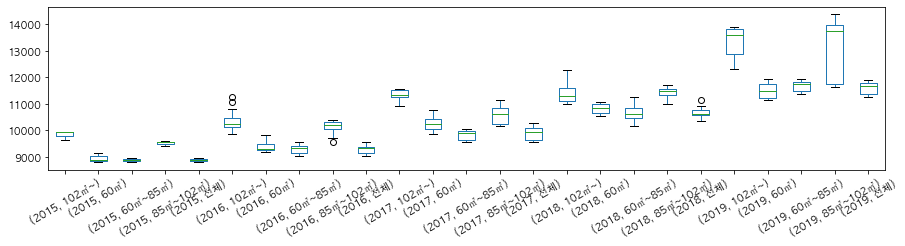

In [164]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

<AxesSubplot:xlabel='연도'>

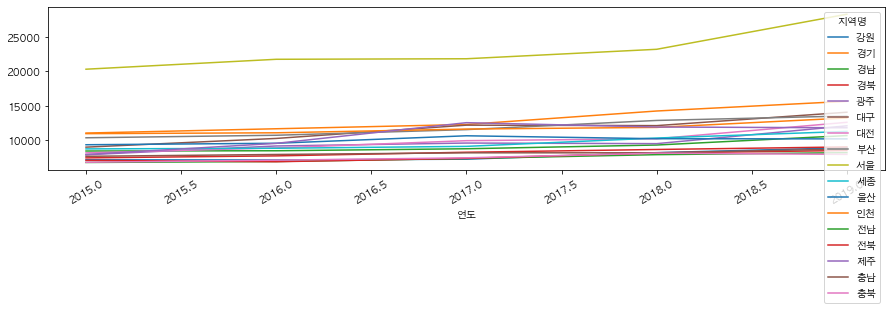

In [165]:
p = df_last.pivot_table(index="연도", columns="지역명", values="평당분양가격")
p.plot(figsize=(15, 3), rot=30)

# Seaborn으로 시각화하기

In [166]:
# seaborn을 import 하기

import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

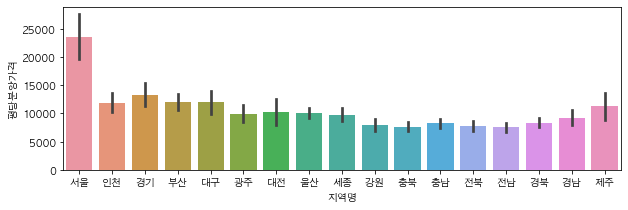

In [167]:
# barplot으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(10, 3))

# 막대 위에 검은 색은 ci(confidence interval) 값을 뜻한다.
# ci의 기본값은 95%이며 cd="sd"는 표준편차 값을 보여준다.
# ci는 추정치를 사용하므로 계산이 오래 걸릴 수 있다. 

sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci="sd")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

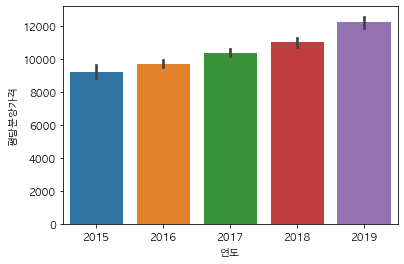

In [168]:
# barplot으로 연도별 평당분양가격을 그린다.

sns.barplot(data=df_last, x="연도", y="평당분양가격")

## Put legend out of the figure

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

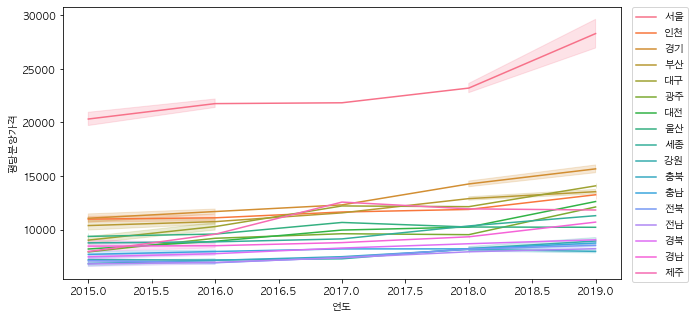

In [169]:
# lineplot으로 연도별 평당분양가격을 그린다.
# hue 옵션을 통해 지역별로 다르게 표시한다.

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

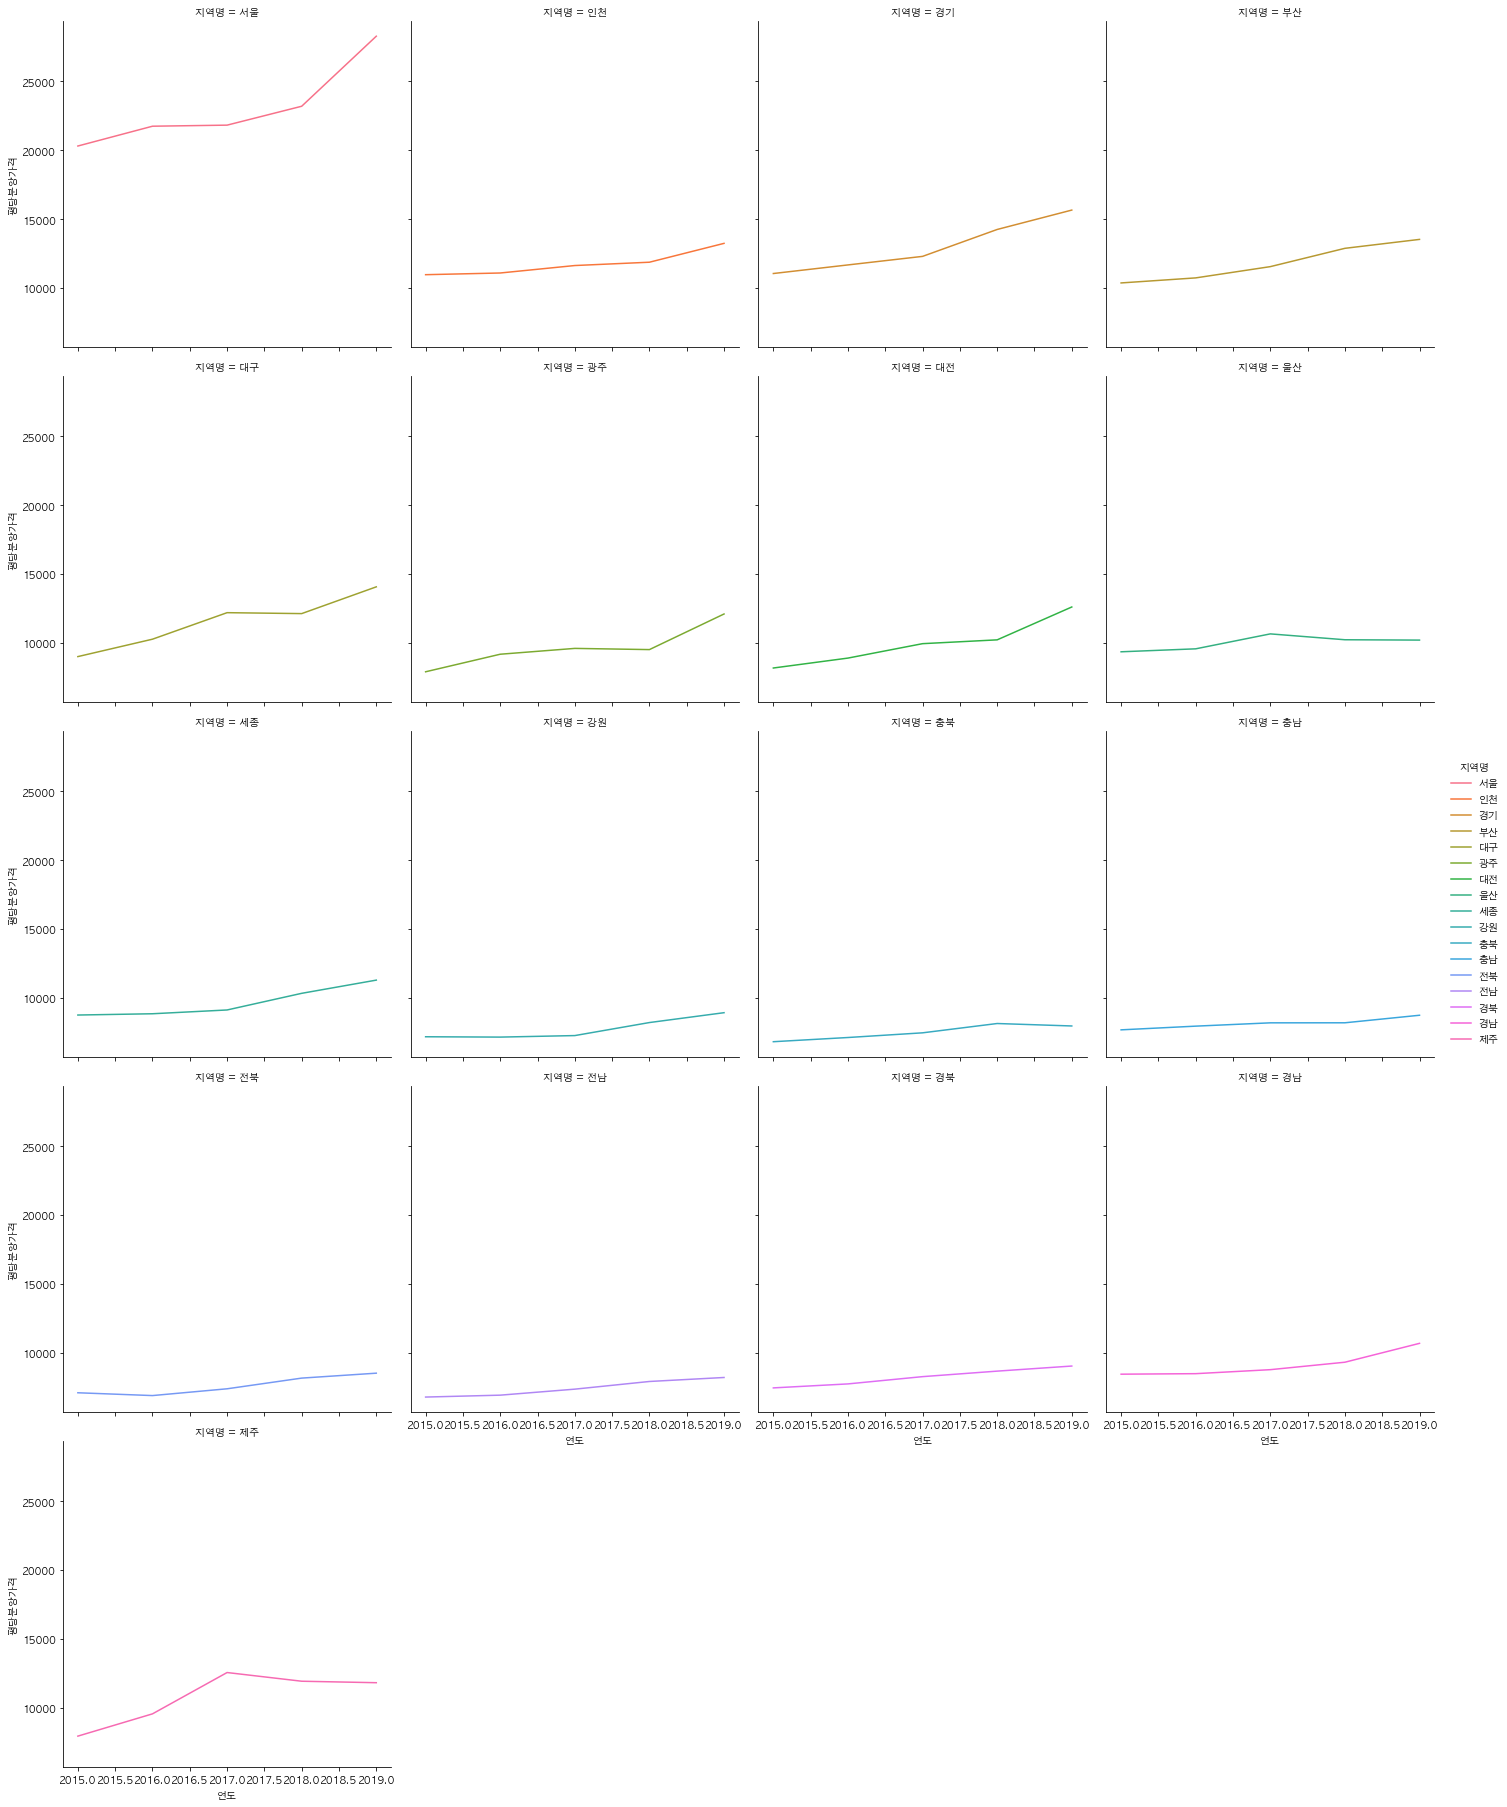

In [170]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

## catplot

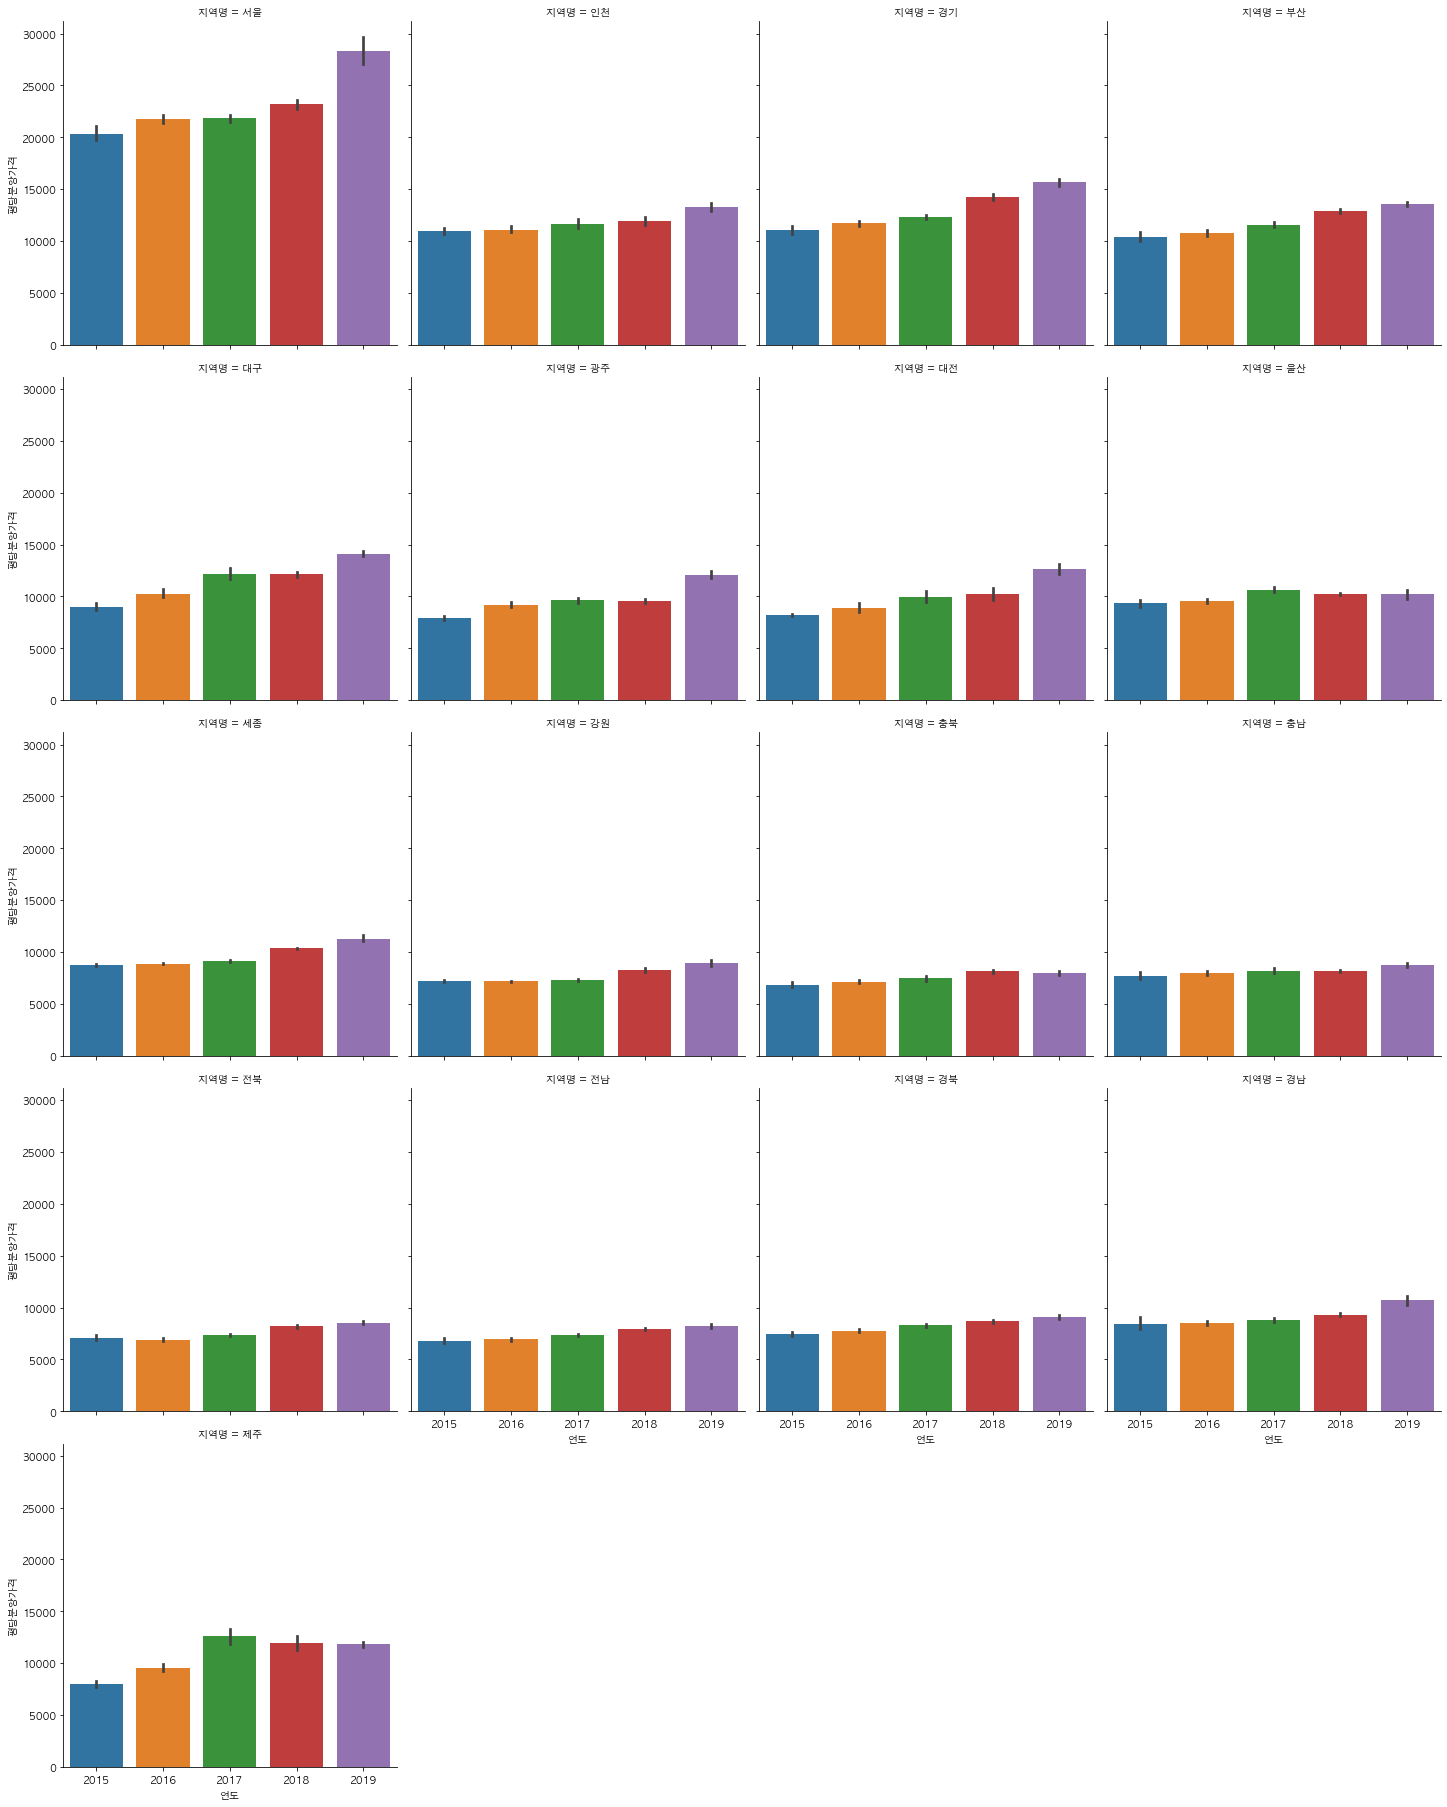

In [171]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

In [172]:
# 쥬피터 노트북에 이미지 삽입 위한 코드

!pip install IPython

In [173]:
# 쥬피터 노트북에 이미지 삽입 위해 Ipython 불러오기

from IPython.display import Image

## relplot과 catplot의 차이점

catplot과 relplot이 서브플롯을 생성할 때, FacetGrid를 그려주는 역할을 한다.
catplot은 범주형 변수에 대한 서브플롯을 그리고, relplot은 수치형 변수에 대한 서브플롯을 그려준다.

![relplot과 catplot의 차이점](image/facetgrid.png)

## boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

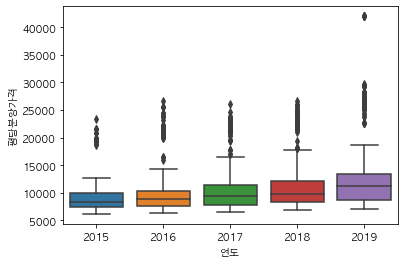

In [174]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

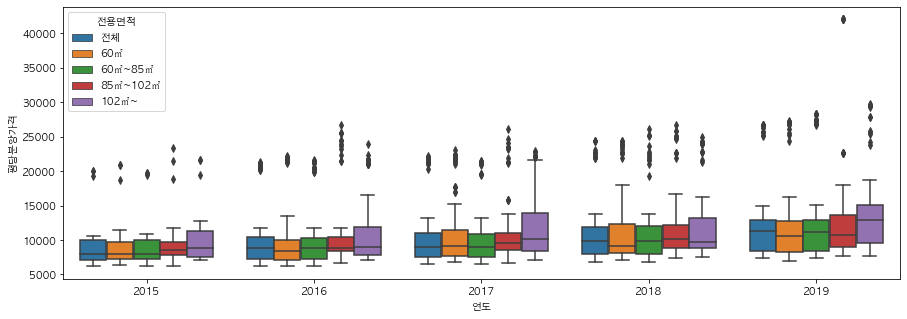

In [175]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.

plt.figure(figsize=(15, 5))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

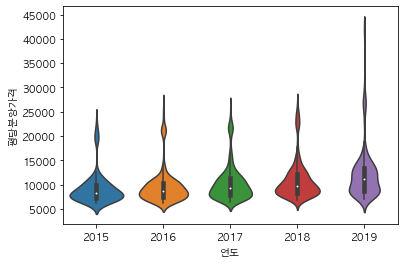

In [176]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
# violinplot은 밀도 추정 그래프를 세로로 세워놓은 모양이다. 

sns.violinplot(data=df_last, x="연도", y="평당분양가격")

## lmplot과 swarmplot

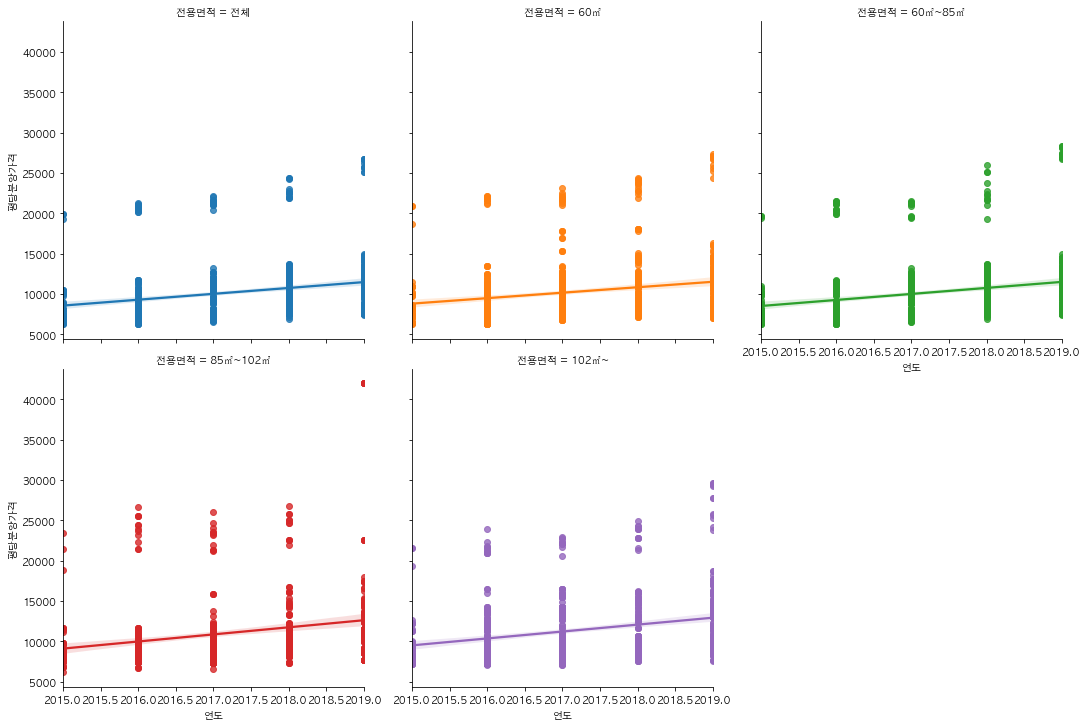

In [177]:
# 연도별 평당분양가격을 lmplot으로 그린다. 
# hue 옵션으로 전용면적을 표현한다.
# regplot에서 hue를 사용하고 싶을 때, lmplot
# lmplot은 x, y축 모두 수치 데이터일 때 적합하다.

sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

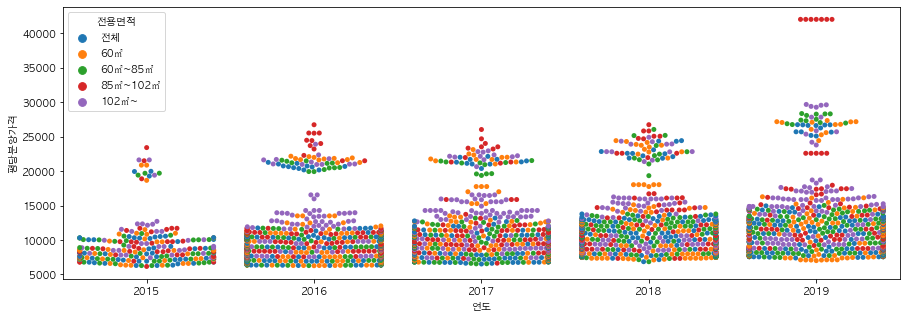

In [178]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
# 다소 오래 걸린다.

plt.figure(figsize=(15, 5))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

## 이상치 보기

In [179]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.

df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [180]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [181]:
# 서울의 평당분양가격이 특히 높은 데이터가 있다. 

df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


## 히스토그램 그리기

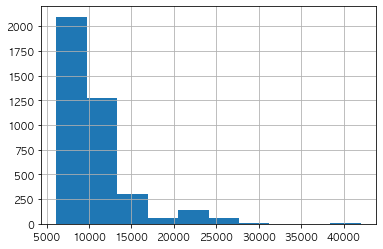

In [182]:
# 10개의 bin에 해당되는 데이터를 담는다.
h = df_last["평당분양가격"].hist(bins=10)

In [183]:
# 결측치가 없는 데이터에서 평당분양가격만 가져온다. 
# .loc[행, 열]

price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

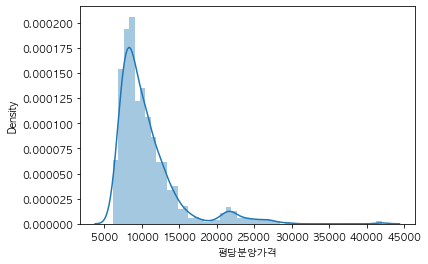

In [184]:
# distplot으로 평당분양가격을 표현.

sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

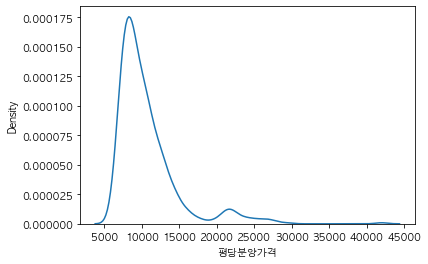

In [185]:
# sns.distplot(price, hist=False, rug=True)
# cumulative=True : 누적 그래프
# kde : 커널 밀도를 추정한 값.

sns.kdeplot(price)

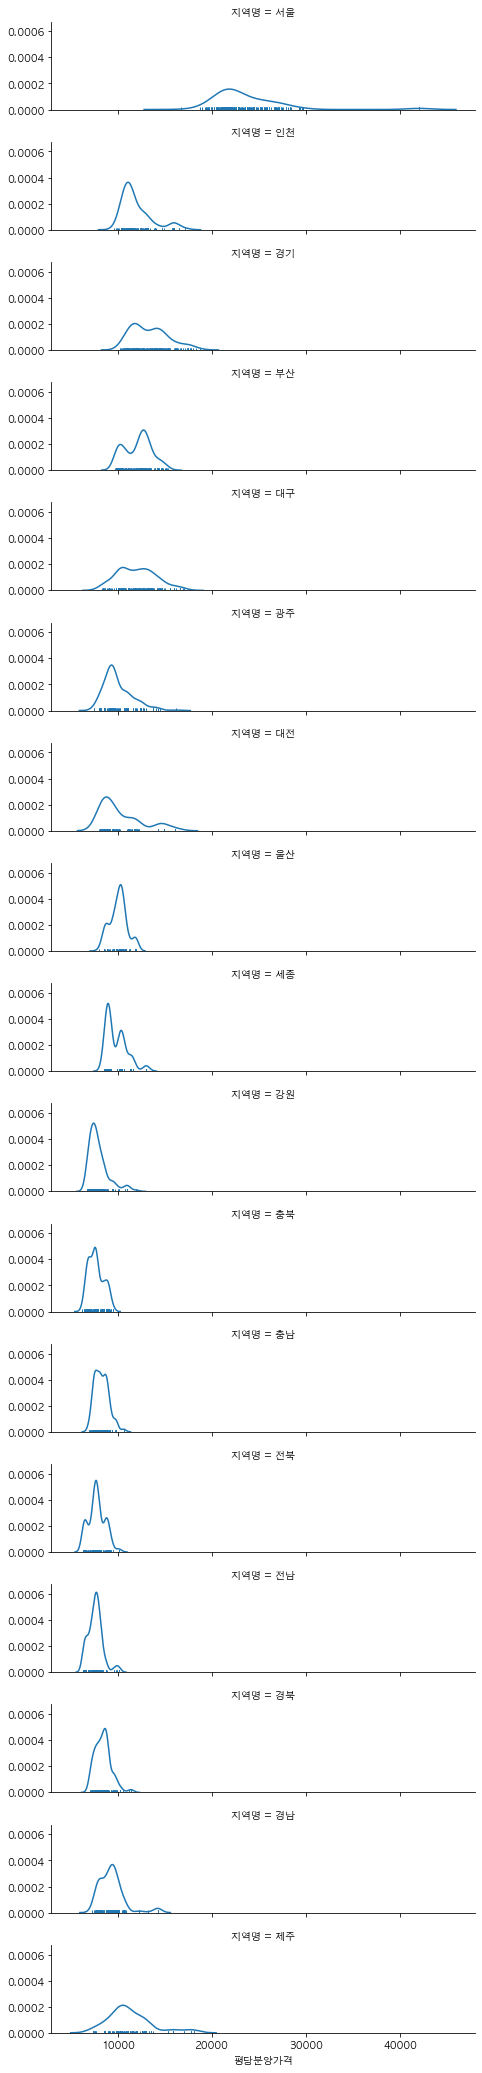

In [186]:
# subplot으로 표현

g = sns.FacetGrid(df_last, row="지역명", height=1.7, aspect=4)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

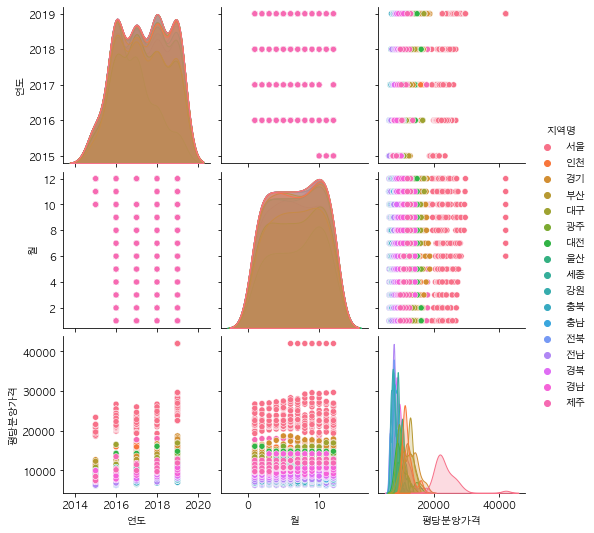

In [187]:
# pairplot

df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                          ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [188]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.

df_last["전용면적"].value_counts()

60㎡~85㎡     867
102㎡~       867
60㎡         867
전체          867
85㎡~102㎡    867
Name: 전용면적, dtype: int64

# 2015년 8월 이전 데이터 다루기

In [189]:
pd.options.display.max_columns = 25

In [190]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [191]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [192]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [193]:
# 결측치 확인

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

## melt를 이용하여 reshaping

[Reshaping by melting](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt)

In [194]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [195]:
df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [196]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담는다. 

df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [197]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


## 연도와 월을 분리하기

In [198]:
date = "2013년12월"
date

'2013년12월'

In [199]:
date.split("년")

['2013', '12월']

In [200]:
date.split("년")[0]

'2013'

In [201]:
date.split("년")[1]

'12월'

In [202]:
date.split("년")[-1].replace('월', "")

'12'

In [203]:
# parse_year라는 함수를 만든다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 한다.

def parse_year(date):
    year = date.split("년")[0]
    return int(year)

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [204]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_month(date):
    month = date.split("년")[-1].replace('월', "")
    return int(month)

parse_month(date)

12

In [206]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담는다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [207]:
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [210]:
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
4138,충남,2019,10,3201.0,10563.3,85㎡~102㎡


In [212]:
df_first_melt.sample()

,지역명,기간,평당분양가격,연도,월
175,대전,2014년10월,8038,2014,10
